# Análise de alunos do integrado do IFRN
a base de dados consiste em dados socioeconômicos e as notas finais de português e matemática do 1º e 2º ano. Essas disciplinas foram selecionadas devido a certeza delas estarem presente em todos os cursos de integrado ofertados no IFRN

In [1]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#ESCALONAMENTO DE DADOS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

#SELECIONANDO MELHOR MODELO
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from scipy.stats import randint as sp_randint
from sklearn.cross_validation import train_test_split

#Evaluating
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score

#EXPORTAR ARVORE
from sklearn.tree import export_graphviz
import os

#CURVA ROC
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import roc_auc_score

#REDUÇÃO DE DIMENSIONALIDADE
from sklearn.decomposition import PCA

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#definicao de funcoes que serao utilizadas

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])   
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')

In [3]:
#importando base já tratada
dados = pd.read_json('dados/dados_filtrado_CA.json')
print(dados.id.nunique())
print(dados.shape)
dados.head(3)

7201
(7201, 27)


,LnguaPortuguesaeLiteraturaI90H,LnguaPortuguesaeLiteraturaII90H,MatemticaI120H,MatemticaII90H,cep,classe,descricao,descricao_area_residencial,descricao_companhia_domiciliar,descricao_historico,descricao_imovel,descricao_mae_escolaridade,descricao_pai_escolaridade,descricao_raca,descricao_responsavel_escolaridade,descricao_responsavel_financeiro,descricao_situacao_matricula_periodo,descricao_trabalho_responsavel,id,nome_escola_ensino_fundamental,percentual_frequencia,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,qnt_salario,qtd_pessoas_domicilio,renda_bruta_familiar,sigla
34217,68,68.0,66,79.0,59535-000,1,Matriculado,Urbana,Mãe,Técnico de Nivel Médio em Informática,Alugado,Ensino fundamental incompleto,Ensino fundamental incompleto,Branca,Ensino fundamental incompleto,Mãe,Dependência,Não informado,457884597605,ESCOLA MUNICIPAL DR. ELOY DE SOUZA,100.0,22/10/1999,F,0,2,300.0,LAJ
34218,73,21.0,23,7.0,59460-000,0,Cancelado,Urbana,Mãe,Técnico de Nível Médio em Meio Ambiente,Alugado,Ensino fundamental incompleto,Ensino fundamental incompleto,Parda,Ensino fundamental incompleto,Mãe,Dependência,Não informado,458436647741,,91.0,04/10/1997,M,0,2,0.0,SPP
34219,70,80.0,61,73.0,59810-000,1,Matriculado,Urbana,Pais,Técnico de Nível Médio em Apicultura,Alugado,Ensino médio completo,Ensino fundamental incompleto,Parda,Ensino fundamental incompleto,Pai,Dependência,Autônomo,452768375385,,98.0,05/07/1999,F,1,6,720.0,PF


In [4]:
df = dados



dados = dados[
                [
                'cep', 'classe', 'descricao_area_residencial', 
                'descricao_companhia_domiciliar', 'descricao_historico', 'descricao_imovel', 
                'descricao_mae_escolaridade', 'descricao_pai_escolaridade', 
                'descricao_raca', 'descricao_responsavel_escolaridade', 
                'descricao_responsavel_financeiro', 'descricao_trabalho_responsavel', 
                'pessoa_fisica__nascimento_data', 'pessoa_fisica__sexo', 
                'qnt_salario', 'qtd_pessoas_domicilio', 'sigla'
                ]
]

dados

,cep,classe,descricao_area_residencial,descricao_companhia_domiciliar,descricao_historico,descricao_imovel,descricao_mae_escolaridade,descricao_pai_escolaridade,descricao_raca,descricao_responsavel_escolaridade,descricao_responsavel_financeiro,descricao_trabalho_responsavel,pessoa_fisica__nascimento_data,pessoa_fisica__sexo,qnt_salario,qtd_pessoas_domicilio,sigla
34217,59535-000,1,Urbana,Mãe,Técnico de Nivel Médio em Informática,Alugado,Ensino fundamental incompleto,Ensino fundamental incompleto,Branca,Ensino fundamental incompleto,Mãe,Não informado,22/10/1999,F,0,2,LAJ
34218,59460-000,0,Urbana,Mãe,Técnico de Nível Médio em Meio Ambiente,Alugado,Ensino fundamental incompleto,Ensino fundamental incompleto,Parda,Ensino fundamental incompleto,Mãe,Não informado,04/10/1997,M,0,2,SPP
34219,59810-000,1,Urbana,Pais,Técnico de Nível Médio em Apicultura,Alugado,Ensino médio completo,Ensino fundamental incompleto,Parda,Ensino fundamental incompleto,Pai,Autônomo,05/07/1999,F,1,6,PF
34220,59611-070,1,Urbana,Mãe,Técnico de Nível Médio em Mecânica,Alugado,Ensino médio completo,Ensino fundamental incompleto,Parda,Ensino médio completo,Mãe,Autônomo,16/07/1998,F,1,2,MO
34221,59190-000,1,Urbana,Pais,Técnico de Nivel Médio em Informática,Alugado,Ensino médio completo,Ensino médio completo,Parda,Ensino médio completo,Mãe,Autônomo,17/06/1999,M,2,5,CANG
34222,59258-000,1,Urbana,Mãe,Técnico de Nível Médio em Administração,Alugado,Ensino médio completo,Ensino médio completo,Branca,Ensino médio completo,Mãe,Não está trabalhando,15/08/2000,M,0,4,NC
34223,59080-050,1,Urbana,Pais,Técnico de Nível Médio em Geologia,Alugado,Ensino médio completo,Ensino médio completo,Parda,Ensino médio completo,Pai,Empresa privada,11/09/2000,F,1,4,CNAT
34224,59104-260,1,Urbana,Mãe,Técnico de Nível Médio em Controle Ambiental,Alugado,Não estudou,Ensino médio completo,Preta,Ensino médio completo,Pai,Serviço público,20/04/1999,F,1,4,CNAT
34225,59520-000,1,Urbana,Mãe,Técnico de Nível Médio em Agroecologia,Alugado,Ensino médio incompleto,Ensino médio incompleto,Parda,Ensino médio incompleto,Mãe,Autônomo,15/04/1999,M,1,3,IP
34227,59032-130,1,Urbana,Mãe,Técnico de Nivel Médio Informática,Alugado,Ensino médio completo,Ensino médio incompleto,Parda,Ensino médio incompleto,Pai,Autônomo,29/05/1999,M,1,4,SGA


In [23]:
#transformando o dado em int
dados['cep'] = dados['cep'].str.replace('-', '')
dados['cep'] = dados['cep'].apply(pd.to_numeric, errors='coerce')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#transformando o dado em int
dados['pessoa_fisica__nascimento_data'] = dados['pessoa_fisica__nascimento_data'].str.replace('/','').apply(int)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
#convertendo os NaN das notas em -1 para usar o RF 
dados['LnguaPortuguesaeLiteraturaI90H'].fillna(-1, inplace=True)
dados['MatemticaI120H'].fillna(-1, inplace=True)
dados['LnguaPortuguesaeLiteraturaII90H'].fillna(-1, inplace=True)
dados['MatemticaII90H'].fillna(-1, inplace=True)

In [25]:
#limpando os NaN devido ao RF
print(dados.shape)
df = dados
df = df.dropna()
dados = df
print(dados.shape)

(7201, 17)
(7084, 17)


In [26]:
#configura os dados de entrada e saída
y = dados.classe
X = dados

del X['classe']
X.shape

(7084, 16)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


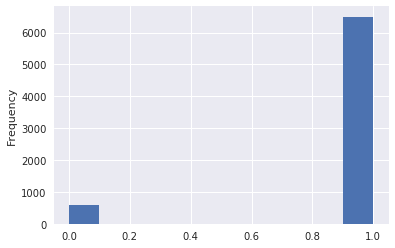

In [27]:
#visualizacao hist da classe
y.plot.hist()

In [28]:
#binazira os dados devido aos atributos categoricos 
dados_dummies = pd.get_dummies(X, drop_first=False)
dados_dummies.shape

(7084, 141)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


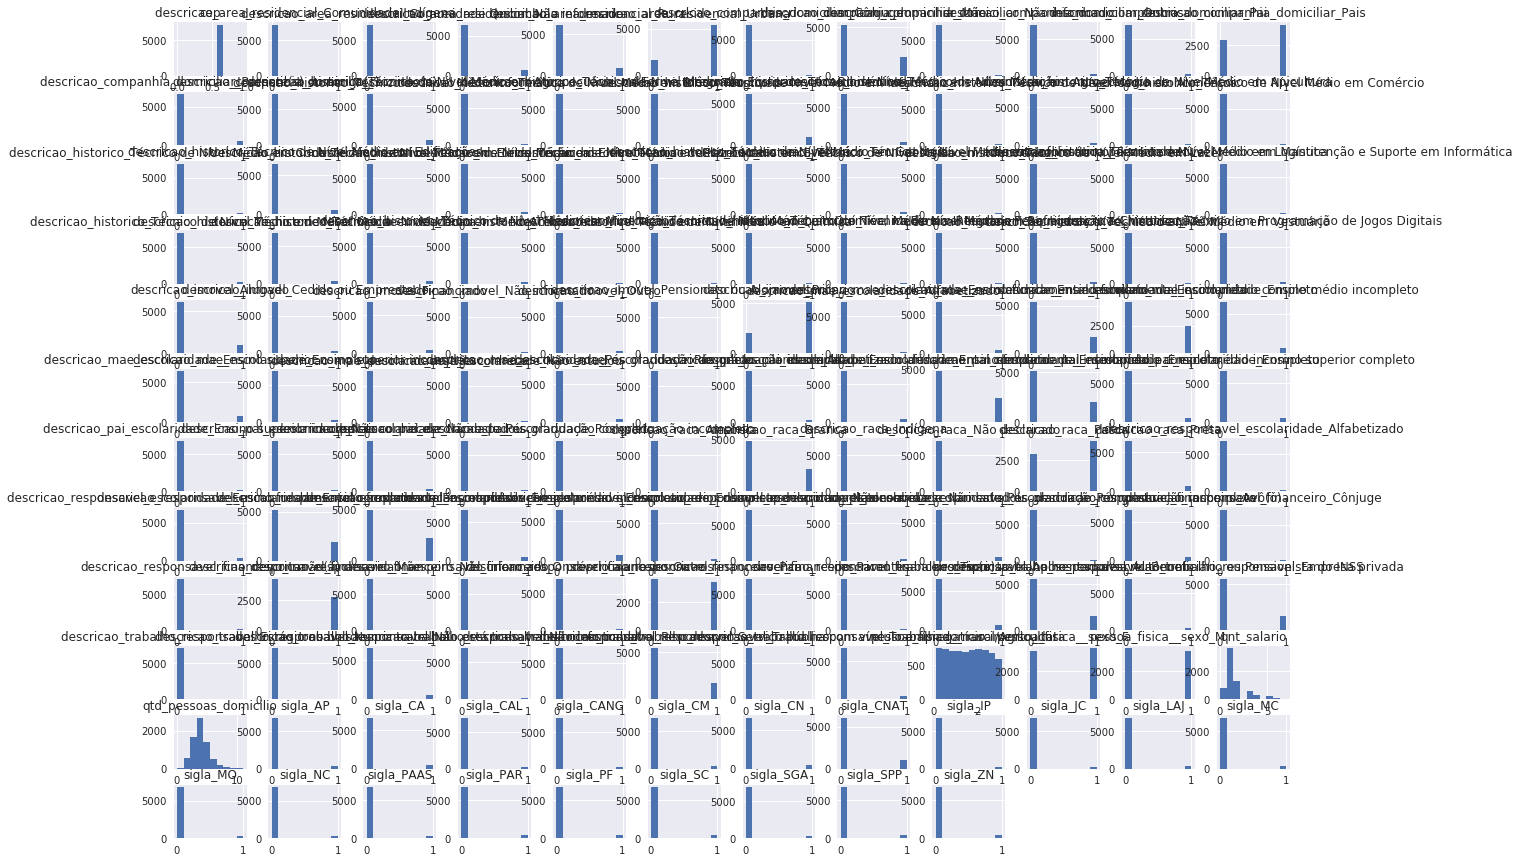

In [29]:
dados_dummies.hist(figsize=(20, 15))
plt.show()

In [30]:
#remove atributos inconistentes
dados_clean = dados_dummies.replace([np.inf, -np.inf], np.nan)
dados_clean = dados_clean.dropna(axis=1, how='all')
dados_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7084 entries, 34217 to 43634
Columns: 141 entries, cep to sigla_ZN
dtypes: float64(1), int64(3), uint8(137)
memory usage: 1.2 MB


In [31]:
#SELECIONANDO MELHOR MODEL RF

#cria a randomforest 
forest_clf = RandomForestClassifier(oob_score=True, n_jobs=-1) 

param_grid_forest = {'max_depth': [3, 5, None],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [10, 30, 60, 100, 200, 500, 1000],
              'criterion': ["gini", "entropy"]}

#dividir os dados para treino e teste. default é 25% p teste
Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)

#seleciona o melhor modelo de acordo com os parâmetros
grid_search_forest = GridSearchCV(estimator=forest_clf, param_grid=param_grid_forest)
grid_search_forest.fit(Xtrain, ytrain)
print(grid_search_forest.best_params_)
print(grid_search_forest.best_estimator_)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


In [32]:
#mostra os 5 melhores modelos
report(grid_search_forest.cv_results_, 5)

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}

Model with rank: 2
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}

Model with rank: 2
Mean validation score: 0.917 (std: 0.001)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

Model with rank: 2
Mean validation score: 0.917 (std: 0.001)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}

Model with rank: 2
Mean validation score: 0.917 (std: 0.001)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 1000}

Model with rank: 2
Mean validation score: 0.917 (std: 0.001)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}



In [33]:
#seleciona o melhor modelo
model_forest = grid_search_forest.best_estimator_
ypred_forest = model_forest.predict(Xtest)

0.921380090498
0.999386503067
0.921380090498
0.999386503067
0.958799293702
141


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


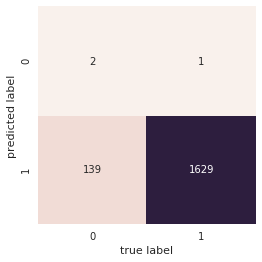

In [34]:
#Evaluating
mat = confusion_matrix(ytest, ypred_forest)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#evaluating
print(precision_score(ytest, ypred_forest))
print(recall_score(ytest, ypred_forest))

#evaluating
print(precision_score(ytest, ypred_forest))
print(recall_score(ytest, ypred_forest))
print(f1_score(ytest, ypred_forest))

#qnt de evadidos 
print(sum(ytest==0))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


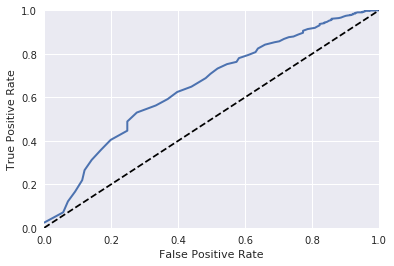

0.652573641387


In [35]:
#CURVA ROC

y_probas_forest = cross_val_predict(model_forest, Xtest, ytest, cv=3, method="predict_proba") 

y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(ytest, y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest) 
plt.show()
print(roc_auc_score(ytest, y_scores_forest))

Feature ranking:
1. feature 1 [pessoa_fisica__nascimento_data] (0.093512)
2. feature 0 [cep] (0.075842)
3. feature 3 [qtd_pessoas_domicilio] (0.054458)
4. feature 2 [qnt_salario] (0.035139)
5. feature 6 [descricao_area_residencial_Não informado] (0.020068)
6. feature 84 [descricao_raca_Parda] (0.016709)
7. feature 120 [pessoa_fisica__sexo_M] (0.016652)
8. feature 119 [pessoa_fisica__sexo_F] (0.016424)
9. feature 108 [descricao_trabalho_responsavel_Autônomo] (0.015607)
10. feature 81 [descricao_raca_Branca] (0.014764)
11. feature 71 [descricao_pai_escolaridade_Ensino fundamental incompleto] (0.014503)
12. feature 14 [descricao_companhia_domiciliar_Pais] (0.013994)
13. feature 57 [descricao_imovel_Próprio] (0.013898)
14. feature 61 [descricao_mae_escolaridade_Ensino médio completo] (0.013273)
15. feature 8 [descricao_area_residencial_Urbana] (0.013018)
16. feature 100 [descricao_responsavel_financeiro_Mãe] (0.012981)
17. feature 116 [descricao_trabalho_responsavel_Serviço público] (0.012

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


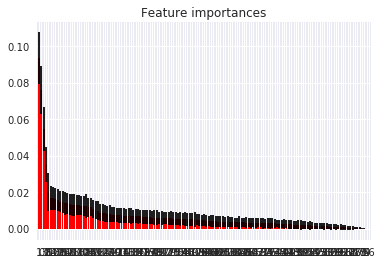

In [36]:
#exibe os atributos mais importantes

importances = model_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xtest.shape[1]):
    print("%d. feature %d [%s] (%f)" % (f + 1, indices[f], dados_clean.columns[indices[f]],importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtest.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(Xtest.shape[1]), indices)
plt.xlim([-1, Xtest.shape[1]])
plt.show()

In [37]:
#DECISION TREE
tree_clf = DecisionTreeClassifier() 

param_grid_tree = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

#seleciona o melhor modelo de acordo com os parâmetros
grid_search_tree = GridSearchCV(estimator=tree_clf, param_grid=param_grid_tree)
grid_search_tree.fit(Xtrain, ytrain)
print(grid_search_tree.best_params_)
print(grid_search_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [38]:
#seleciona o melhor modelo e exibe os 5 melhores
report(grid_search_tree.cv_results_, 5)

model_tree = grid_search_tree.best_estimator_
ypred_tree = model_tree.predict(Xtest)

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.917 (std: 0.001)
Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.917 (std: 0.001)
Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.917 (std: 0.001)
Parameters: {'criterion'

0.917560700169
0.920634920635
0.996319018405
0.956982911019


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


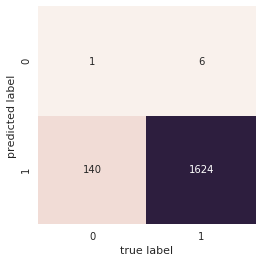

In [39]:
#porcentagem de predicao correta
n_correct = sum(ypred_tree == ytest)    
print(n_correct / len(ypred_tree)) 

#evaluating
mat = confusion_matrix(ytest, ypred_tree)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#evaluating
print(precision_score(ytest, ypred_tree))
print(recall_score(ytest, ypred_tree))
print(f1_score(ytest, ypred_tree))

In [46]:
#gera a arvore de decisao
export_graphviz(model_tree,
                feature_names=dados_clean.columns,
                filled=True,
                rounded=True, 
                out_file='tree.dot')

os.system('dot -Tpng tree.dot -o tree.png')

-1

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


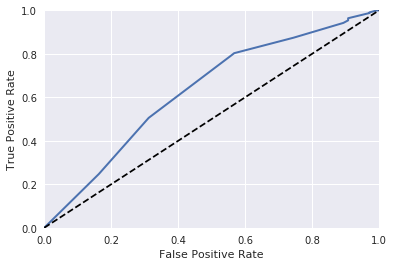

0.631201322717


In [40]:
y_probas_tree = cross_val_predict(model_tree, Xtest, ytest, cv=3, method="predict_proba") 

y_scores_tree = y_probas_tree[:, 1]   # score = proba of positive class 
fpr_tree, tpr_tree, thresholds_tree = roc_curve(ytest, y_scores_tree)

plot_roc_curve(fpr_tree, tpr_tree) 
plt.show()
print(roc_auc_score(ytest, y_scores_tree))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


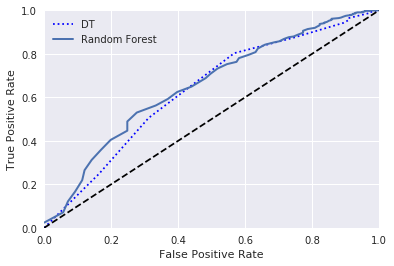

In [41]:
#PLOTAR DUAS CURVAS ROC (DT e RF)
plt.plot(fpr_tree, tpr_tree, "b:", label="DT") 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="bottom right") 
plt.show()

In [8]:
#importando base já tratada
dados = pd.read_json('dados/dados_filtrado_CA.json')
dados = dados[
                ['LnguaPortuguesaeLiteraturaI90H', 'LnguaPortuguesaeLiteraturaII90H', 
                 'MatemticaI120H', 'MatemticaII90H',
                'cep', 'classe', 'descricao_area_residencial', 
                'descricao_companhia_domiciliar', 'descricao_historico', 'descricao_imovel', 
                'descricao_mae_escolaridade', 'descricao_pai_escolaridade', 
                'descricao_raca', 'descricao_responsavel_escolaridade', 
                'descricao_responsavel_financeiro', 'descricao_trabalho_responsavel', 
                'pessoa_fisica__nascimento_data', 'pessoa_fisica__sexo', 
                'qnt_salario', 'qtd_pessoas_domicilio', 'sigla'
                ]
]

In [7]:
#transformando o dado em int
dados['cep'] = dados['cep'].str.replace('-', '')
dados['cep'] = dados['cep'].apply(pd.to_numeric, errors='coerce')

#transformando o dado em int
dados['pessoa_fisica__nascimento_data'] = dados['pessoa_fisica__nascimento_data'].str.replace('/','').apply(int)

#convertendo os NaN das notas em -1 para usar o RF 
dados['LnguaPortuguesaeLiteraturaI90H'].fillna(-1, inplace=True)
dados['MatemticaI120H'].fillna(-1, inplace=True)
dados['LnguaPortuguesaeLiteraturaII90H'].fillna(-1, inplace=True)
dados['MatemticaII90H'].fillna(-1, inplace=True)

#limpando os NaN devido ao RF
print(dados.shape)
df = dados
df = df.dropna()
dados = df
print(dados.shape)

#configura os dados de entrada e saída
y = dados.classe
X = dados

del X['classe']
X.shape

#binazira os dados devido aos atributos categoricos 
dados_dummies = pd.get_dummies(X, drop_first=False)
dados_dummies.shape

#remove atributos inconistentes
dados_clean = dados_dummies.replace([np.inf, -np.inf], np.nan)
dados_clean = dados_clean.dropna(axis=1, how='all')
dados_clean.info()

(7201, 21)
(7084, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7084 entries, 34217 to 43634
Columns: 145 entries, LnguaPortuguesaeLiteraturaI90H to sigla_ZN
dtypes: float64(3), int64(5), uint8(137)
memory usage: 1.4 MB


In [46]:
#SELECIONANDO MELHOR MODEL RF

#cria a randomforest 
forest_clf = RandomForestClassifier(oob_score=True, n_jobs=-1) 

param_grid_forest = {'max_depth': [3, 5, None],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [10, 30, 60, 100, 200, 500, 1000],
              'criterion': ["gini", "entropy"]}

#dividir os dados para treino e teste. default é 25% p teste
Xtrain, Xtest, ytrain, ytest = train_test_split(dados_clean, y, random_state=0)

#seleciona o melhor modelo de acordo com os parâmetros
grid_search_forest = GridSearchCV(estimator=forest_clf, param_grid=param_grid_forest)
grid_search_forest.fit(Xtrain, ytrain)
print(grid_search_forest.best_params_)
print(grid_search_forest.best_estimator_)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


In [ ]:
#mostra os 5 melhores modelos
report(grid_search_forest.cv_results_, 5)

#seleciona o melhor modelo
model_forest = grid_search_forest.best_estimator_
ypred_forest = model_forest.predict(Xtest)

In [ ]:
#Evaluating
mat = confusion_matrix(ytest, ypred_forest)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#evaluating
print(precision_score(ytest, ypred_forest))
print(recall_score(ytest, ypred_forest))

#evaluating
print(precision_score(ytest, ypred_forest))
print(recall_score(ytest, ypred_forest))
print(f1_score(ytest, ypred_forest))

#qnt de evadidos 
print(sum(ytest==0))

In [ ]:
#CURVA ROC

y_probas_forest = cross_val_predict(model_forest, Xtest, ytest, cv=3, method="predict_proba") 

y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(ytest, y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest) 
plt.show()
print(roc_auc_score(ytest, y_scores_forest))

In [ ]:
#exibe os atributos mais importantes

importances = model_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xtest.shape[1]):
    print("%d. feature %d [%s] (%f)" % (f + 1, indices[f], dados_clean.columns[indices[f]],importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtest.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(Xtest.shape[1]), indices)
plt.xlim([-1, Xtest.shape[1]])
plt.show()

In [ ]:
#DECISION TREE
tree_clf = DecisionTreeClassifier() 

param_grid_tree = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

#seleciona o melhor modelo de acordo com os parâmetros
grid_search_tree = GridSearchCV(estimator=tree_clf, param_grid=param_grid_tree)
grid_search_tree.fit(Xtrain, ytrain)
print(grid_search_tree.best_params_)
print(grid_search_tree.best_estimator_)

In [ ]:
#seleciona o melhor modelo e exibe os 5 melhores
report(grid_search_tree.cv_results_, 5)

model_tree = grid_search_tree.best_estimator_
ypred_tree = model_tree.predict(Xtest)

In [ ]:
#porcentagem de predicao correta
n_correct = sum(ypred_tree == ytest)    
print(n_correct / len(ypred_tree)) 

#evaluating
mat = confusion_matrix(ytest, ypred_tree)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#evaluating
print(precision_score(ytest, ypred_tree))
print(recall_score(ytest, ypred_tree))
print(f1_score(ytest, ypred_tree))

In [ ]:
y_probas_tree = cross_val_predict(model_tree, Xtest, ytest, cv=3, method="predict_proba") 

y_scores_tree = y_probas_tree[:, 1]   # score = proba of positive class 
fpr_tree, tpr_tree, thresholds_tree = roc_curve(ytest, y_scores_tree)

plot_roc_curve(fpr_tree, tpr_tree) 
plt.show()
print(roc_auc_score(ytest, y_scores_tree))

In [ ]:
#PLOTAR DUAS CURVAS ROC (DT e RF)
plt.plot(fpr_tree, tpr_tree, "b:", label="DT") 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="bottom right") 
plt.show()

# utilizando informacao CA
filtrando de acordo com os atributos que no note "EDA" tem maior relação com a evasão na análise de CA

In [34]:
#importando base já tratada
dados = pd.read_json('dados/dados_filtrado_CA.json')
dados = dados[
                ['LnguaPortuguesaeLiteraturaI90H', 'LnguaPortuguesaeLiteraturaII90H', 
                 'MatemticaI120H', 'MatemticaII90H',
                'cep', 'classe', 'descricao_area_residencial', 
                'descricao_companhia_domiciliar', 'descricao_historico', 'descricao_imovel', 
                'descricao_mae_escolaridade', 'descricao_pai_escolaridade', 
                'descricao_raca', 'descricao_responsavel_escolaridade', 
                'descricao_responsavel_financeiro', 'descricao_trabalho_responsavel', 
                'pessoa_fisica__nascimento_data', 'pessoa_fisica__sexo', 
                'qnt_salario', 'qtd_pessoas_domicilio', 'sigla'
                ]
]

In [35]:
#transformando o dado em int
dados['cep'] = dados['cep'].str.replace('-', '')
dados['cep'] = dados['cep'].apply(pd.to_numeric, errors='coerce')

#transformando o dado em int
dados['pessoa_fisica__nascimento_data'] = dados['pessoa_fisica__nascimento_data'].str.replace('/','').apply(int)

#convertendo os NaN das notas em -1 para usar o RF 
dados['LnguaPortuguesaeLiteraturaI90H'].fillna(-1, inplace=True)
dados['MatemticaI120H'].fillna(-1, inplace=True)
dados['LnguaPortuguesaeLiteraturaII90H'].fillna(-1, inplace=True)
dados['MatemticaII90H'].fillna(-1, inplace=True)

#limpando os NaN devido ao RF
print(dados.shape)
df = dados
df = df.dropna()
dados = df
print(dados.shape)

#configura os dados de entrada e saída
y = dados.classe
X = dados

del X['classe']
X.shape

#binazira os dados devido aos atributos categoricos 
dados_dummies = pd.get_dummies(X, drop_first=False)
dados_dummies.shape

#remove atributos inconistentes
dados_clean = dados_dummies.replace([np.inf, -np.inf], np.nan)
dados_clean = dados_clean.dropna(axis=1, how='all')
dados_clean.info()

(7201, 21)
(7084, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7084 entries, 34217 to 43634
Columns: 145 entries, LnguaPortuguesaeLiteraturaI90H to sigla_ZN
dtypes: float64(3), int64(5), uint8(137)
memory usage: 1.4 MB


In [33]:
print(dados_clean.shape)
for c in dados_clean.columns:
    print(c)

(3356, 138)
LnguaPortuguesaeLiteraturaI90H
LnguaPortuguesaeLiteraturaII90H
MatemticaI120H
MatemticaII90H
cep
pessoa_fisica__nascimento_data
qnt_salario
qtd_pessoas_domicilio
descricao_area_residencial_Comunidade Quilombola
descricao_area_residencial_Não informado
descricao_area_residencial_Rural
descricao_area_residencial_Urbana
descricao_companhia_domiciliar_Cônjuge
descricao_companhia_domiciliar_Mãe
descricao_companhia_domiciliar_Não informado
descricao_companhia_domiciliar_Outros
descricao_companhia_domiciliar_Pai
descricao_companhia_domiciliar_Pais
descricao_companhia_domiciliar_Parente(s) ou amigo(s)
descricao_companhia_domiciliar_Sozinho(a)
descricao_historico_Técnico de Nivel Médio Informática
descricao_historico_Técnico de Nivel Médio em Agropecuária, na Forma Integrada
descricao_historico_Técnico de Nivel Médio em Biocombustíveis
descricao_historico_Técnico de Nivel Médio em Informática
descricao_historico_Técnico de Nível Médio em Administração
descricao_historico_Técnico de 

In [36]:
dados_filtrado = dados_clean[
                                [
                                #'cep', 
                                #'pessoa_fisica__nascimento_data', 
                                    
                                #'descricao_area_residencial', 
                                'descricao_area_residencial_Não informado',
                                'descricao_area_residencial_Rural',
                                    
                                #'descricao_companhia_domiciliar', 
                                'descricao_companhia_domiciliar_Cônjuge', 
                                'descricao_companhia_domiciliar_Outros', 
                                'descricao_companhia_domiciliar_Parente(s) ou amigo(s)',   
                                    
                                #'descricao_historico', 
                                'descricao_historico_Técnico de Nivel Médio Informática',
                                'descricao_historico_Técnico de Nivel Médio em Agropecuária, na Forma Integrada', 
                                'descricao_historico_Técnico de Nivel Médio em Biocombustíveis', 
                                'descricao_historico_Técnico de Nivel Médio em Equipamentos Biomédicos',
                                'descricao_historico_Técnico de Nivel Médio em Informática',
                                'descricao_historico_Técnico de Nível Médio em Administração',
                                'descricao_historico_Técnico de Nível Médio em Agroecologia',
                                'descricao_historico_Técnico de Nível Médio em Alimentos',
                                'descricao_historico_Técnico de Nível Médio em Apicultura',
                                'descricao_historico_Técnico de Nível Médio em Comércio',
                                'descricao_historico_Técnico de Nível Médio em Controle Ambiental',
                                'descricao_historico_Técnico de Nível Médio em Edificações',
                                'descricao_historico_Técnico de Nível Médio em Eletromecânica',
                                'descricao_historico_Técnico de Nível Médio em Eletrotécnica',
                                'descricao_historico_Técnico de Nível Médio em Eletrônica',
                                'descricao_historico_Técnico de Nível Médio em Eventos',
                                'descricao_historico_Técnico de Nível Médio em Geologia',
                                'descricao_historico_Técnico de Nível Médio em Informática',
                                'descricao_historico_Técnico de Nível Médio em Informática para Internet',
                                'descricao_historico_Técnico de Nível Médio em Lazer',
                                'descricao_historico_Técnico de Nível Médio em Logística',
                                'descricao_historico_Técnico de Nível Médio em Manutenção e Suporte em Informática',
                                'descricao_historico_Técnico de Nível Médio em Mecatrônica',
                                'descricao_historico_Técnico de Nível Médio em Mecânica',
                                'descricao_historico_Técnico de Nível Médio em Meio Ambiente',
                                'descricao_historico_Técnico de Nível Médio em Mineração',
                                'descricao_historico_Técnico de Nível Médio em Multimídia',
                                'descricao_historico_Técnico de Nível Médio em Química',
                                'descricao_historico_Técnico de Nível Médio em Química, na Forma Integrado',
                                'descricao_historico_Técnico de Nível Médio em Recursos Pesqueiros',
                                'descricao_historico_Técnico de Nível Médio em Refrigeração e Climatização',
                                'descricao_historico_Técnico de Nível Médio em Têxtil',
                                'descricao_historico_Técnico de Nível Médio em Vestuário',
                                'descricao_historico_Técnico em Programação de Jogos Digitais',
                                       
                                #'descricao_imovel', 
                                'descricao_imovel_Alugado',
                                'descricao_imovel_Não informado',    
                                    
                                #'descricao_mae_escolaridade',
                                'descricao_mae_escolaridade_Ensino fundamental incompleto',
                                'descricao_mae_escolaridade_Alfabetizado',
                                    
                                #'descricao_pai_escolaridade', 
                                'descricao_pai_escolaridade_Ensino fundamental incompleto', 
                                'descricao_pai_escolaridade_Alfabetizado',
                                
                                #'descricao_raca', 
                                'descricao_raca_Amarela', 
                                'descricao_raca_Preta',
                                
                                #'descricao_responsavel_escolaridade',
                                'descricao_responsavel_escolaridade_Ensino fundamental incompleto', 
                                'descricao_responsavel_escolaridade_Alfabetizado', 
                                    
                                #'descricao_responsavel_financeiro',
                                'descricao_responsavel_financeiro_Mãe',
                                'descricao_responsavel_financeiro_Avô(ó)',
                                
                                #'descricao_trabalho_responsavel', 
                                'descricao_trabalho_responsavel_Não informado',
                                    
                                #'pessoa_fisica__sexo', 
                                'pessoa_fisica__sexo_F',
                                
                                'qnt_salario', 
                                'qtd_pessoas_domicilio', 
                                
                                #'sigla'
                                'sigla_AP',
                                'sigla_CA',
                                'sigla_CAL',
                                'sigla_CANG',
                                'sigla_CM',
                                'sigla_CN',
                                'sigla_CNAT',
                                'sigla_IP',
                                'sigla_JC',
                                'sigla_LAJ',
                                'sigla_MC',
                                'sigla_MO',
                                'sigla_NC',
                                'sigla_PAAS',
                                'sigla_PAR',
                                'sigla_PF',
                                'sigla_SC',
                                'sigla_SGA',
                                'sigla_SPP',
                                'sigla_ZN'
                                
                                ]
                            ]

In [37]:
print(dados_clean.shape)
print(dados_filtrado.shape)

#dividir os dados para treino e teste. default é 25% p teste
Xtrain, Xtest, ytrain, ytest = train_test_split(dados_filtrado, y, random_state=0)

print(Xtest.shape)

(7084, 145)
(7084, 75)
(1771, 75)


In [38]:
#SELECIONANDO MELHOR MODEL RF

#cria a randomforest 
forest_clf = RandomForestClassifier(oob_score=True, n_jobs=-1) 

param_grid_forest = {'max_depth': [3, 5, None],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [10, 30, 60, 100, 200, 500, 1000],
              'criterion': ["gini", "entropy"]}

#seleciona o melhor modelo de acordo com os parâmetros
grid_search_forest = GridSearchCV(estimator=forest_clf, param_grid=param_grid_forest)
grid_search_forest.fit(Xtrain, ytrain)
print(grid_search_forest.best_params_)
print(grid_search_forest.best_estimator_)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [39]:
#mostra os 5 melhores modelos
report(grid_search_forest.cv_results_, 5)

#seleciona o melhor modelo
model_forest = grid_search_forest.best_estimator_
ypred_forest = model_forest.predict(Xtest)

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}

Model with rank: 2
Mean validation score: 0.916 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 10}

Model with rank: 2
Mean validation score: 0.916 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 30}

Model with rank: 2
Mean validation score: 0.916 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 60}

Model with rank: 2
Mean validation score: 0.916 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.916 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}

Model with rank: 2
Mean validation score: 0.916 (std: 0.000)
P

0.920383963862
1.0
0.920383963862
1.0
0.95854160541
141


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


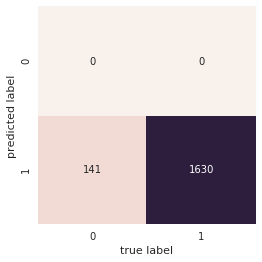

In [40]:
#Evaluating
mat = confusion_matrix(ytest, ypred_forest)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#evaluating
print(precision_score(ytest, ypred_forest))
print(recall_score(ytest, ypred_forest))

#evaluating
print(precision_score(ytest, ypred_forest))
print(recall_score(ytest, ypred_forest))
print(f1_score(ytest, ypred_forest))

#qnt de evadidos 
print(sum(ytest==0))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs 

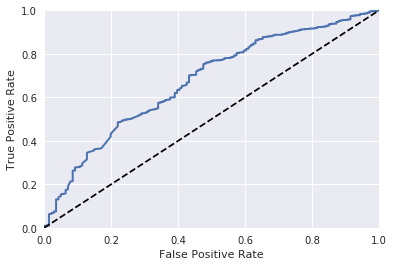

0.67302789018


In [41]:
#CURVA ROC

y_probas_forest = cross_val_predict(model_forest, Xtest, ytest, cv=3, method="predict_proba") 

y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(ytest, y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest) 
plt.show()
print(roc_auc_score(ytest, y_scores_forest))

Feature ranking:
1. feature 54 [qtd_pessoas_domicilio] (0.138291)
2. feature 0 [descricao_area_residencial_Não informado] (0.101152)
3. feature 2 [descricao_companhia_domiciliar_Cônjuge] (0.066050)
4. feature 9 [descricao_historico_Técnico de Nivel Médio em Informática] (0.046613)
5. feature 40 [descricao_imovel_Não informado] (0.040133)
6. feature 51 [descricao_trabalho_responsavel_Não informado] (0.039697)
7. feature 42 [descricao_mae_escolaridade_Alfabetizado] (0.038060)
8. feature 63 [sigla_JC] (0.037229)
9. feature 65 [sigla_MC] (0.036371)
10. feature 43 [descricao_pai_escolaridade_Ensino fundamental incompleto] (0.035865)
11. feature 53 [qnt_salario] (0.033279)
12. feature 41 [descricao_mae_escolaridade_Ensino fundamental incompleto] (0.031545)
13. feature 3 [descricao_companhia_domiciliar_Outros] (0.024460)
14. feature 47 [descricao_responsavel_escolaridade_Ensino fundamental incompleto] (0.022536)
15. feature 48 [descricao_responsavel_escolaridade_Alfabetizado] (0.022051)
16. f

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


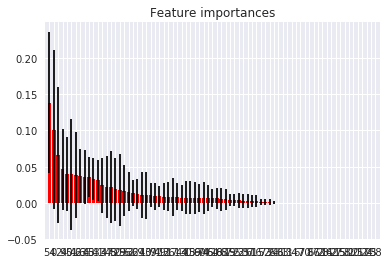

In [42]:
#exibe os atributos mais importantes

importances = model_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xtest.shape[1]):
    print("%d. feature %d [%s] (%f)" % (f + 1, indices[f], dados_filtrado.columns[indices[f]],importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtest.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(Xtest.shape[1]), indices)
plt.xlim([-1, Xtest.shape[1]])
plt.show()

In [43]:
#DECISION TREE
tree_clf = DecisionTreeClassifier() 

param_grid_tree = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

#seleciona o melhor modelo de acordo com os parâmetros
grid_search_tree = GridSearchCV(estimator=tree_clf, param_grid=param_grid_tree)
grid_search_tree.fit(Xtrain, ytrain)
print(grid_search_tree.best_params_)
print(grid_search_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [44]:
#seleciona o melhor modelo e exibe os 5 melhores
report(grid_search_tree.cv_results_, 5)

model_tree = grid_search_tree.best_estimator_
ypred_tree = model_tree.predict(Xtest)

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.917 (std: 0.000)
Parameters: {'criterion'

0.917560700169
0.920634920635
0.996319018405
0.956982911019


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


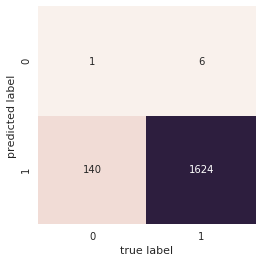

In [45]:
#porcentagem de predicao correta
n_correct = sum(ypred_tree == ytest)    
print(n_correct / len(ypred_tree)) 

#evaluating
mat = confusion_matrix(ytest, ypred_tree)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#evaluating
print(precision_score(ytest, ypred_tree))
print(recall_score(ytest, ypred_tree))
print(f1_score(ytest, ypred_tree))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


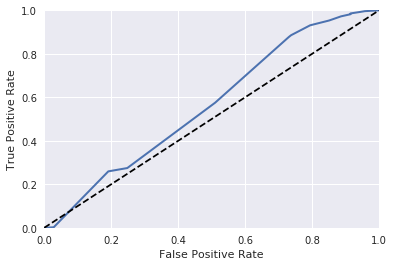

0.565609363443


In [46]:
y_probas_tree = cross_val_predict(model_tree, Xtest, ytest, cv=3, method="predict_proba") 

y_scores_tree = y_probas_tree[:, 1]   # score = proba of positive class 
fpr_tree, tpr_tree, thresholds_tree = roc_curve(ytest, y_scores_tree)

plot_roc_curve(fpr_tree, tpr_tree) 
plt.show()
print(roc_auc_score(ytest, y_scores_tree))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


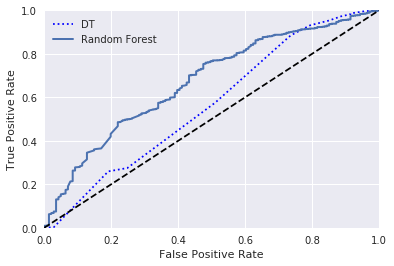

In [47]:
#PLOTAR DUAS CURVAS ROC (DT e RF)
plt.plot(fpr_tree, tpr_tree, "b:", label="DT") 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="bottom right") 
plt.show()

In [75]:
dados_filtrado = dados_clean[
                                [
                                #'LnguaPortuguesaeLiteraturaI90H', 
                                #'LnguaPortuguesaeLiteraturaII90H', 
                                #'MatemticaI120H', 
                                #'MatemticaII90H',                                    
                                #'cep', 
                                #'pessoa_fisica__nascimento_data', 
                                    
                                #'descricao_area_residencial', 
                                'descricao_area_residencial_Não informado',
                                'descricao_area_residencial_Rural',
                                    
                                #'descricao_companhia_domiciliar', 
                                'descricao_companhia_domiciliar_Cônjuge', 
                                'descricao_companhia_domiciliar_Outros', 
                                'descricao_companhia_domiciliar_Parente(s) ou amigo(s)',   
                                    
                                #'descricao_historico', 
                                'descricao_historico_Técnico de Nivel Médio Informática',
                                'descricao_historico_Técnico de Nivel Médio em Agropecuária, na Forma Integrada', 
                                'descricao_historico_Técnico de Nivel Médio em Biocombustíveis', 
                                'descricao_historico_Técnico de Nivel Médio em Equipamentos Biomédicos',
                                'descricao_historico_Técnico de Nivel Médio em Informática',
                                'descricao_historico_Técnico de Nível Médio em Administração',
                                'descricao_historico_Técnico de Nível Médio em Agroecologia',
                                'descricao_historico_Técnico de Nível Médio em Alimentos',
                                'descricao_historico_Técnico de Nível Médio em Apicultura',
                                'descricao_historico_Técnico de Nível Médio em Comércio',
                                'descricao_historico_Técnico de Nível Médio em Controle Ambiental',
                                'descricao_historico_Técnico de Nível Médio em Edificações',
                                'descricao_historico_Técnico de Nível Médio em Eletromecânica',
                                'descricao_historico_Técnico de Nível Médio em Eletrotécnica',
                                'descricao_historico_Técnico de Nível Médio em Eletrônica',
                                'descricao_historico_Técnico de Nível Médio em Eventos',
                                'descricao_historico_Técnico de Nível Médio em Geologia',
                                'descricao_historico_Técnico de Nível Médio em Informática',
                                'descricao_historico_Técnico de Nível Médio em Informática para Internet',
                                'descricao_historico_Técnico de Nível Médio em Lazer',
                                'descricao_historico_Técnico de Nível Médio em Logística',
                                'descricao_historico_Técnico de Nível Médio em Manutenção e Suporte em Informática',
                                'descricao_historico_Técnico de Nível Médio em Mecatrônica',
                                'descricao_historico_Técnico de Nível Médio em Mecânica',
                                'descricao_historico_Técnico de Nível Médio em Meio Ambiente',
                                'descricao_historico_Técnico de Nível Médio em Mineração',
                                'descricao_historico_Técnico de Nível Médio em Multimídia',
                                'descricao_historico_Técnico de Nível Médio em Química',
                                'descricao_historico_Técnico de Nível Médio em Química, na Forma Integrado',
                                'descricao_historico_Técnico de Nível Médio em Recursos Pesqueiros',
                                'descricao_historico_Técnico de Nível Médio em Refrigeração e Climatização',
                                'descricao_historico_Técnico de Nível Médio em Têxtil',
                                'descricao_historico_Técnico de Nível Médio em Vestuário',
                                'descricao_historico_Técnico em Programação de Jogos Digitais',
                                       
                                #'descricao_imovel', 
                                'descricao_imovel_Alugado',
                                'descricao_imovel_Não informado',    
                                    
                                #'descricao_mae_escolaridade',
                                'descricao_mae_escolaridade_Ensino fundamental incompleto',
                                'descricao_mae_escolaridade_Alfabetizado',
                                    
                                #'descricao_pai_escolaridade', 
                                'descricao_pai_escolaridade_Ensino fundamental incompleto', 
                                'descricao_pai_escolaridade_Alfabetizado',
                                
                                #'descricao_raca', 
                                'descricao_raca_Amarela', 
                                'descricao_raca_Preta',
                                
                                #'descricao_responsavel_escolaridade',
                                'descricao_responsavel_escolaridade_Ensino fundamental incompleto', 
                                'descricao_responsavel_escolaridade_Alfabetizado', 
                                    
                                #'descricao_responsavel_financeiro',
                                'descricao_responsavel_financeiro_Mãe',
                                'descricao_responsavel_financeiro_Avô(ó)',
                                
                                #'descricao_trabalho_responsavel', 
                                'descricao_trabalho_responsavel_Não informado',
                                    
                                #'pessoa_fisica__sexo', 
                                'pessoa_fisica__sexo_F',
                                
                                'qnt_salario', 
                                'qtd_pessoas_domicilio', 
                                
                                #'sigla'
                                'sigla_AP',
                                'sigla_CA',
                                'sigla_CAL',
                                'sigla_CANG',
                                'sigla_CM',
                                'sigla_CN',
                                'sigla_CNAT',
                                'sigla_IP',
                                'sigla_JC',
                                'sigla_LAJ',
                                'sigla_MC',
                                'sigla_MO',
                                'sigla_NC',
                                'sigla_PAAS',
                                'sigla_PAR',
                                'sigla_PF',
                                'sigla_SC',
                                'sigla_SGA',
                                'sigla_SPP',
                                'sigla_ZN',
                     
#dados complementares
#'descricao_area_residencial_Urbana',
#'descricao_companhia_domiciliar_Pais',
#'descricao_imovel_Cedido ou Emprestado',
#'descricao_imovel_Financiado',
#'descricao_mae_escolaridade_Ensino médio completo',
#'descricao_mae_escolaridade_Ensino superior completo',
#'descricao_mae_escolaridade_Pós graduação completo',
#'descricao_pai_escolaridade_Ensino médio completo',
#'descricao_pai_escolaridade_Ensino superior completo',
#'descricao_pai_escolaridade_Não estudou',
#'descricao_raca_Branca',
#'descricao_raca_Parda',
#'descricao_responsavel_escolaridade_Ensino médio completo',
#'descricao_responsavel_escolaridade_Pós graduação completo',
#'descricao_responsavel_financeiro_Pai',
#'descricao_trabalho_responsavel_Empresa privada',
#'descricao_trabalho_responsavel_Serviço público',
#'pessoa_fisica__sexo_M'          

                                
                                ]
                            ]

In [76]:
#dividir os dados para treino e teste. default é 25% p teste
Xtrain, Xtest, ytrain, ytest = train_test_split(dados_filtrado, y, random_state=0)

In [ ]:
#teste com parametros e notas
#DECISION TREE
tree_clf = DecisionTreeClassifier() 

param_grid_tree = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

#seleciona o melhor modelo de acordo com os parâmetros
grid_search_tree = GridSearchCV(estimator=tree_clf, param_grid=param_grid_tree)
grid_search_tree.fit(Xtrain, ytrain)
print(grid_search_tree.best_params_)
print(grid_search_tree.best_estimator_)

#seleciona o melhor modelo e exibe os 5 melhores
report(grid_search_tree.cv_results_, 5)

model_tree = grid_search_tree.best_estimator_
ypred_tree = model_tree.predict(Xtest)

#porcentagem de predicao correta
n_correct = sum(ypred_tree == ytest)    
print(n_correct / len(ypred_tree)) 

#evaluating
mat = confusion_matrix(ytest, ypred_tree)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#evaluating
print(precision_score(ytest, ypred_tree))
print(recall_score(ytest, ypred_tree))
print(f1_score(ytest, ypred_tree))

fig = plt.figure()

y_probas_tree = cross_val_predict(model_tree, Xtest, ytest, cv=3, method="predict_proba") 

y_scores_tree = y_probas_tree[:, 1]   # score = proba of positive class 
fpr_tree, tpr_tree, thresholds_tree = roc_curve(ytest, y_scores_tree)

plot_roc_curve(fpr_tree, tpr_tree) 
plt.show()
print(roc_auc_score(ytest, y_scores_tree))

fig = plt.figure()

#PLOTAR DUAS CURVAS ROC (DT e RF)
plt.plot(fpr_tree, tpr_tree, "b:", label="DT") 
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="bottom right") 
plt.show()